# Mutli-layered Perceptron





In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
import sklearn
import dataframe_image as dfi

In [2]:
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        self.lr = lr
        self.shuffle = shuffle

    def fit(self, X, y, initial_weights=None):
        self.weights = self.initialize_weights(X) if not initial_weights else initial_weights
        num_epochs = 10
        for j in range(num_epochs):
            threshold = 0
            for i in range(len(X)):
                z = 0
                net = np.sum(X[i] * self.weights)
                if net >= threshold:
                    z = 1
                delta_w = (self.lr * (y[i] - z)) * X[i]
                self.weights = self.weights + delta_w
            if self.shuffle == True:
                X, y = self._shuffle_data(X,y)
        return self
    
    def fit_till_converge(self, X, y, initial_weights = None):
        num_epochs = 0
        self.weights = self.initialize_weights(X) if not initial_weights else initial_weights
        threshold = 0
        misclass_acc_list = [1000]
        non_change_count = 0
        crazy_big_number = 10000
        
        train_acc = []
        test_acc = []
        
        for j in range(crazy_big_number):
            if non_change_count == 2:
                break
            for i in range(len(X)):
                z = 0
                net = np.sum(X[i] * self.weights)
                if net >= threshold:
                    z = 1
                delta_w = (self.lr * (y[i] - z)) * X[i]
                self.weights = self.weights + delta_w
                x_train, y_train, x_test, y_test = self.split_data(X,y)
                
                if self.shuffle == True:
                    X, y = self._shuffle_data(X,y)
            train_acc.append(self.score(x_train, y_train))
            test_acc.append(self.score(x_test, y_test))
            num_epochs = num_epochs + 1
            acc = self.score(X,y)
            misclass_acc = 1 - acc
            if np.abs(misclass_acc - misclass_acc_list[-1]) < .01:
                non_change_count = non_change_count + 1
            else:
                non_change_count = 0
            misclass_acc_list.append(misclass_acc)
        
        return train_acc, test_acc, num_epochs
        
    def predict(self, X):
        threshold = 0
        predict = []
        for i in range(len(X)):
            z = 0
            net = np.sum(X[i] * self.weights)
            if net >= threshold:
                z = 1
            predict.append(z)
        return np.array(predict)

    def initialize_weights(self, x):
        return np.zeros(len(x[0]))

    def score(self, X, y):
        score = self.predict(X)
        num_correct = np.sum(score == y)
        return np.sum(score == y) / len(y)

    def _shuffle_data(self, X, y):
        y = np.reshape(y,(len(y),1))
        all_data = np.concatenate((X,y), axis=1)
        np.random.shuffle(all_data)
        new_x = all_data[:,0:-1]
        new_y = all_data[:,-1]
        return new_x, new_y

    def get_weights(self):
        return self.weights
    
    def split_data(self, X, y, test_perc = .7):
        x,y = self._shuffle_data(X,y)
        y = np.reshape(y,(len(y),1))
        all_data = np.concatenate((x,y), axis = 1)
        all_data_len = len(all_data)
        rows_train = int(all_data_len * test_perc)
        
        all_data_train = all_data[0:rows_train]
        all_data_test = all_data[rows_train:len(all_data)]
        
        x_train = all_data_train[:,0:-1]
        y_train = all_data_train[:,-1]
        
        x_test = all_data_test[:,0:-1]
        y_test = all_data_test[:,-1]
        
        return x_train, y_train, x_test, y_test

In [4]:
# Load debug data
debug = pd.DataFrame(arff.loadarff('datasets/linsep2nonorigin.arff')[0])

# decode debug['class'] to remove the 'b' from the results.
debug['class'] = debug['class'].str.decode('utf-8')

# change debug['class'] series dtype from 'object' to 'int.'
debug['class'] = pd.to_numeric(debug['class'])

debug_x = debug.iloc[:,:-1]
debug_x['bias'] = np.ones(len(debug_x))

debug_x = np.array(debug_x)
debug_y = np.array(debug.iloc[:,-1])

# Train on debug data
# define the debug perceptron
debug_percept = PerceptronClassifier(shuffle = False)
debug_percept.fit(debug_x,debug_y)

# Print accuracy and weights
print('Accuracy: ',debug_percept.score(debug_x,debug_y))
print('Weights: ',debug_percept.get_weights())

Accuracy:  0.875
Weights:  [-0.2   0.17 -0.1 ]


In [6]:
# Load evaluation data
eval = pd.DataFrame(arff.loadarff('datasets/bank.arff')[0])
eval['class'] = eval['class'].str.decode('utf-8')
eval['class'] = pd.to_numeric(eval['class'])

eval_x = eval.iloc[:,:-1]
eval_x['bias'] = np.ones(len(eval_x))

eval_x = np.array(eval_x)
eval_y = np.array(eval.iloc[:,-1])


# Train on evaluation data
eval_percept = PerceptronClassifier(shuffle = True)
eval_percept.fit(eval_x, eval_y)


# Print accuracy and weights
print('Accuracy: ',eval_percept.score(eval_x,eval_y))
print('Weights: ',eval_percept.get_weights())

Accuracy:  0.9854227405247813
Weights:  [-6.94458797 -4.477747   -4.5347011  -0.8130084   6.5       ]


In [8]:
lin_sep = pd.read_csv("datasets/lin_sep.csv")
non_lin_sep = pd.read_csv("datasets/non_lin_sep.csv")

#### Train Linearly Separable

In [9]:
lin_sep_x = lin_sep.iloc[:,:-1]
lin_sep_x['bias'] = np.ones(len(lin_sep_x))

lin_sep_x = np.array(lin_sep_x)
lin_sep_y = np.array(lin_sep.iloc[:,-1])

lin_sep_percept = PerceptronClassifier(shuffle = True)
lin_sep_percept.fit(lin_sep_x, lin_sep_y)
print('Accuracy for Lin Sep: ', lin_sep_percept.score(lin_sep_x, lin_sep_y))
print('Weights for Lin Sep: ', lin_sep_percept.get_weights())

Accuracy for Lin Sep:  1.0
Weights for Lin Sep:  [-0.1   0.14  0.  ]


#### Train Non-Linearly Separable

In [10]:
non_lin_sep_x = non_lin_sep.iloc[:,:-1]
non_lin_sep_x['bias'] = np.ones(len(non_lin_sep_x))

non_lin_sep_x = np.array(non_lin_sep_x)
non_lin_sep_y = np.array(non_lin_sep.iloc[:,-1])

non_lin_sep_percept = PerceptronClassifier(shuffle = True)
non_lin_sep_percept.fit(non_lin_sep_x, non_lin_sep_y)
print('Accuracy for Non Lin Sep: ', non_lin_sep_percept.score(non_lin_sep_x, non_lin_sep_y))
print('Weights for Non Lin Sep: ', non_lin_sep_percept.get_weights())

Accuracy for Non Lin Sep:  0.5
Weights for Non Lin Sep:  [-0.07 -0.03 -0.1 ]


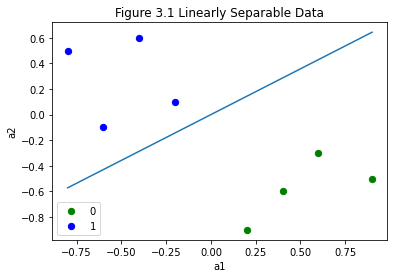

In [11]:
#Linearly Separable

fig, ax = plt.subplots()

colors = ('green', 'blue')
for n_class in range(2):
    ax.scatter(lin_sep[lin_sep['class'] == n_class].iloc[:,0],
               lin_sep[lin_sep['class'] == n_class].iloc[:,1],
               c=colors[n_class],
               s = 40, 
               label = str(n_class))
    
weights = lin_sep_percept.get_weights()

x_min = np.min(lin_sep_x[:,0])
x_max = np.max(lin_sep_x[:,0])

X = np.arange(x_min, x_max,.01)
m = -weights[0] / weights[1]
c = -weights[2] / weights[1]
ax.plot(X, m * X + c )

plt.title("Figure 3.1 Linearly Separable Data")
plt.xlabel("a1")
plt.ylabel("a2")
plt.legend()
plt.plot()
# plt.savefig('lin_sep_data.jpg')
plt.show()

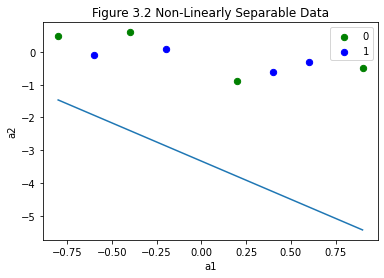

In [12]:
#Non-Linearly Separable

fig, ax = plt.subplots()

colors = ('green', 'blue')
for n_class in range(2):
    ax.scatter(non_lin_sep[non_lin_sep['class'] == n_class].iloc[:,0],
               non_lin_sep[non_lin_sep['class'] == n_class].iloc[:,1],
               c=colors[n_class],
               s = 40, 
               label = str(n_class))
    
weights = non_lin_sep_percept.get_weights()

x_min = np.min(non_lin_sep_x[:,0])
x_max = np.max(non_lin_sep_x[:,0])

X = np.arange(x_min, x_max,.01)
m = -weights[0] / weights[1]
b = -weights[2] / weights[1]
ax.plot(X, m * X + b )
plt.title("Figure 3.2 Non-Linearly Separable Data")
plt.xlabel("a1")
plt.ylabel("a2")
plt.legend()
plt.plot()
# plt.savefig('non_lin_sep_data.jpg')
plt.show()

### Voting Dataset

In [15]:
vote = pd.DataFrame(arff.loadarff('datasets/voting-dataset.arff')[0])
vote = vote.apply(lambda x: x.str.decode('utf8'))

vote['Class'] = np.where(vote['Class'] == 'democrat', 1, 0)
vote = vote.replace(to_replace = ['y','n'],value = ['1','0'])
vote = vote.astype('float')

vote_x = vote.iloc[:,:-1]
vote_x['bias'] = np.ones(len(vote_x))

vote_x = np.array(vote_x)
vote_y = np.array(vote.iloc[:,-1])

num_trials = 5

train_acc_table = []
test_acc_table = []

for i in range(num_trials):
    vote_percept = PerceptronClassifier()
    train_acc, test_acc, num_epochs = vote_percept.fit_till_converge(vote_x, vote_y)
    train_acc_table.append(train_acc)
    test_acc_table.append(test_acc)

In [17]:
train_acc_table = pd.DataFrame(train_acc_table)
test_acc_table = pd.DataFrame(test_acc_table)

train_acc_means = train_acc_table.mean('index').tolist()
test_acc_means = test_acc_table.mean('index').tolist()

epoch_nums = list(range(len(train_acc_means)))
new_list = [x+1 for x in epoch_nums]

table = pd.DataFrame(
    {'train_acc': train_acc_means,
     'test_acc': test_acc_means,
     'num_epochs': new_list
    })

table.loc['Average'] = table.mean()
# dfi.export(table, 'table.png')
table

,train_acc,test_acc,num_epochs
0,0.932919,0.945324,1.0
1,0.938509,0.942446,2.0
2,0.945342,0.951079,3.0
3,0.946429,0.937050,4.0
4,0.931677,0.935252,5.0
5,0.942029,0.911271,6.0
6,0.937888,0.956835,7.0
7,0.970497,0.964029,8.0
8,0.961180,0.985612,9.0
9,0.947205,0.949640,10.0


In [18]:
master_vote_percept = PerceptronClassifier()
master_vote_percept.fit(vote_x, vote_y)
weights = master_vote_percept.get_weights()

weights = np.reshape(weights,(1,len(weights)))
weightsDF = pd.DataFrame(weights, columns = list(vote.columns))
weightsDF

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,-0.1,0.4,0.7,-1.6,-0.4,2.775558e-17,-0.6,-0.4,0.7,-0.5,0.5,-0.2,-0.1,-0.1,0.5,-0.1,0.9


Whether an individual was in favor of the adoption of the budget resolution is the biggest predictor on whether that person votes democratic or republican. Synsfuels coroporation 

In [19]:
train_acc_list = table.train_acc.tolist()
misclass = [1-x for x in train_acc_list]

In [20]:
print(misclass)
def plot_misclassification(avg_misclassification_rate):
    plt.plot(np.arange(len(avg_misclassification_rate)), avg_misclassification_rate)
    plt.title("Figure 4.2: Average Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    # plt.savefig('misclass_epoch.jpg')
    plt.show()

[0.0670807453416149, 0.06149068322981377, 0.05465838509316767, 0.05357142857142849, 0.06832298136645976, 0.05797101449275355, 0.06211180124223603, 0.029503105590062084, 0.03881987577639756, 0.052795031055900665, 0.05590062111801242, 0.04347826086956519, 0.05380866114561755]


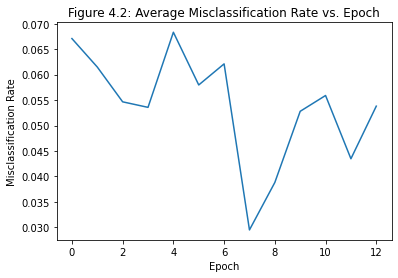

In [21]:
plot_misclassification(misclass)

In [22]:
perceptron = sklearn.linear_model.Perceptron()

perceptron.fit(vote_x, vote_y)
perceptron.score(vote_x, vote_y)

0.9609544468546638

The sklearn model and my model performed similarly. The sklearn was reaching 96% accuracy and my model was getting upwards of 97% accuracy but averaged around 95%.

In [30]:
dumbed_down_iris = pd.DataFrame(arff.loadarff('datasets/iris.arff')[0])
dumbed_down_iris

dumbed_down_iris['class'] = dumbed_down_iris['class'].str.decode('utf-8')
dumbed_down_iris['class'] = np.where(dumbed_down_iris['class'] == 'Iris-setosa', 1, 0)

dd_iris_x = dumbed_down_iris.iloc[:,:-1]
dd_iris_x['bias'] = np.ones(len(dd_iris_x))

dd_iris_y = dumbed_down_iris.iloc[:,-1]

dd_iris_x, dd_iris_y = np.array(dd_iris_x), np.array(dd_iris_y)

# Train on your dataset
dumbed_down_iris_percept = sklearn.linear_model.Perceptron(max_iter = 100)

dumbed_down_iris_percept.fit(dd_iris_x, dd_iris_y)
dumbed_down_iris_percept.score(dd_iris_x, dd_iris_y)

1.0

Well, the data that I passed into the sklearn perceptron was extraoridarily easily to separate. I passed in the Iris dataset, but only used the iris-setosa and the iris-versicolor which are linearly separable.